## Testing of vertical coordinate conversion for model data

This notebook tries to summarise different cases of how vertical coordinates can be represented in the data and how these cases can be handled with pyaerocom. Here, the ultimate goal is to retrieve, for each grid point of a variable data file $\mathcal{F}$ (e.g. containing 4D field of extinction coefficients), the altitude above sea level in units of m.

Different cases include:

1. Additional gridded data file that has same shape as $\mathcal{F}$ that contains altitude for each grid point (CASE 1).
2. Additional gridded data file that has same shape as $\mathcal{F}$ that contains pressure levels (CASE 2).
3. Data file contains all information to convert model level to pressure (cases follow):

In [1]:
import pyaerocom as pya

Init data paths for lustre


0.006805419921875 s


In [19]:
MOD1 = 'ECMWF_GSTX_T255' # additional file with altitude levels
MOD2 = 'CAM5.3-Oslo_AP3-CTRL2016-PD' # additional file with air pressure
MOD3 = 'ECHAM6.3-HAM2.3_AP3-CTRL2016-PD'
MOD4 = 'HadGEM3_GLOFIR5' #

#### Define two example coordinates

One at sealevel (**sl**) and one at Hardangervidda mountain plateau (**hv**):

In [20]:
lat_sl = 50
lon_sl = -20

lat_hv = 60.13
lon_hv = 7.45

#### Define 2 dictionaries that store the profiles of all cases at both locations (sea-level and Hardangervidda coordinates)

In [21]:
profiles_sl = {}

In [22]:
profiles_hv = {}

#### Define helper method to extract a profile at a certain location

In [40]:
def extract_profile_arr(data, lat, lon, time_idx):
    try:
        data.check_dimcoords_tseries()
    except:
        data.reorder_dimensions_tseries()
        data.check_dimcoords_tseries()
        
    lon_idx = np.argmin(np.abs(data.longitude.points - lon))
    lat_idx = np.argmin(np.abs(data.latitude.points - lat))
    print(data.coord_names)
    print(data.shape)
    return data[time_idx, lat_idx, lon_idx, :]

In [41]:
from warnings import filterwarnings
filterwarnings('ignore')

### CASE 1:  Additional altitude field

For this dataset, a second NetCDF file that contains the altitude field needs to be loaded. From this file, the altitude can be computed directly.

In [46]:
reader = pya.io.ReadGridded(MOD1)
print(reader)


Pyaerocom ReadGridded
---------------------
Model ID: ECMWF_GSTX_T255
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_GSTX_T255/renamed
Available variables: ['bscatc532aerboa', 'bscatc532aertoa', 'ec532aer', 'ec532aer3D', 'time', 'z', 'zml']
Available years: [2010]
Available time resolutions ['daily']


#### Read extinction and altitude levels

In [ ]:
ec = reader.read_var('ec532aer')
alt = reader.read_var('z')

In [ ]:
ec.ts_type

In [57]:
ec_sl = extract_profile_arr(ec, lat_sl, lon_sl, 30)
alt_sl = extract_profile_arr(alt, lat_sl, lon_sl, 30)

ec_hv = extract_profile_arr(ec, lat_hv, lon_hv, 30)
alt_hv = extract_profile_arr(alt, lat_hv, lon_hv, 30)

['time', 'latitude', 'longitude', 'model_level_number']
(365, 241, 480, 60)
['time', 'latitude', 'longitude', 'model_level_number']
(365, 241, 480, 60)


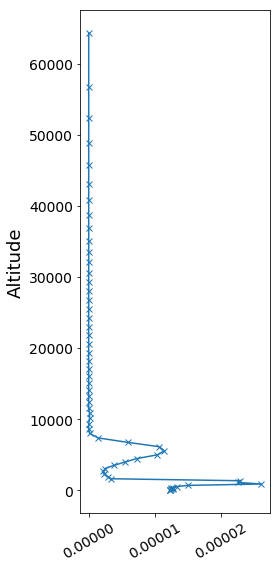

In [55]:
import matplotlib.pyplot as plt
prof = pya.VerticalProfile(ec_sl.grid.data, alt_sl.grid.data, units)
prof.plot()

### CASE 2:  CAM5.3-Oslo

For this dataset, a second NetCDF file that contains the pressure field needs to be loaded. From this file, the altitude can be computed directly.

In [7]:
import pyaerocom as pya

In [8]:
reader = pya.io.ReadGridded(MOD2)
print(reader)


Pyaerocom ReadGridded
---------------------
Model ID: CAM5.3-Oslo_AP3-CTRL2016-PD
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III/CAM5.3-Oslo_AP3-CTRL2016-PD/renamed
Available variables: ['abs440aer', 'abs440aercs', 'abs500aer', 'abs5503Daer', 'abs550aer', 'abs550bc', 'abs550dryaer', 'abs550dust', 'abs550oa', 'abs550so4', 'abs550ss', 'abs670aer', 'abs870aer', 'airmass', 'area', 'asy3Daer', 'bc5503Daer', 'ccn0c02p', 'ccn0c05p', 'ccn0c10p', 'ccn0c20p', 'ccn0c50p', 'ccn1c00p', 'cheaqpso4', 'chegpso4', 'chepso2', 'cl3D', 'cldnci', 'cldncl', 'clt', 'cltl', 'drybc', 'drydms', 'drydust', 'dryoa', 'dryso2', 'dryso4', 'dryss', 'ec5503Daer', 'ec550dryaer', 'emibc', 'emidms', 'emidust', 'emioa', 'emiso2', 'emiso4', 'emiss', 'hus', 'landf', 'loadbc', 'loaddms', 'loaddust', 'loadoa', 'loadso2', 'loadso4', 'loadss', 'mmraerh2o', 'mmrbc', 'mmrdu', 'mmroa', 'mmrso4', 'mmrss', 'od440aer', 'od440csaer', 'od550aer', 'od550aerh2o', 'od550bc', 'od550csaer', 'od550du

#### Load extinction data

In [18]:
ec = reader.read_var('ec550dryaer')

In [10]:
ec_sl = extract_profile_arr(ec, lat_sl, lon_sl, 0)
ec_sl

pyaerocom.GriddedData
Grid data: <iris 'Cube' of Dry aerosol extinction at 550nm / (1/Mm) (atmosphere_hybrid_sigma_pressure_coordinate: 30)>

#### Load pressure data

In [11]:
p = reader.read_var('pressure')
p

pyaerocom.GriddedData
Grid data: <iris 'Cube' of pres / (Pa) (time: 12; atmosphere_hybrid_sigma_pressure_coordinate: 30; latitude: 192; longitude: 288)>

In [12]:
parr_sl = extract_profile_arr(p, lat_sl, lon_sl, 0)
parr_sl

pyaerocom.GriddedData
Grid data: <iris 'Cube' of pres / (Pa) (atmosphere_hybrid_sigma_pressure_coordinate: 30)>

In [13]:
if not parr_sl.unit == 'Pa':
    raise ValueError('Invalid unit')

#### Convert pressure to altitude

In [14]:
_d = parr_sl.grid.data
if isinstance(_d, np.ma.masked_array):
    _d = _d.data
alts_sl = pya.vert_coords.pressure2altitude(_d)
alts_sl

array([29137.828  , 26858.908  , 24608.537  , 22478.404  , 20563.93   ,
       18901.51   , 17525.875  , 16494.309  , 15620.185  , 14718.609  ,
       13788.724  , 12829.639  , 11833.034  , 10799.578  ,  9735.284  ,
        8638.9795 ,  7509.4834 ,  6345.597  ,  5146.108  ,  4003.9521 ,
        3024.5076 ,  2235.4685 ,  1648.2659 ,  1271.5187 ,  1012.0693 ,
         776.007  ,   563.7178 ,   375.5582 ,   211.84006,    73.01258],
      dtype=float32)

Text(0.5, 1.0, 'Atlantic (50N, 20W), Jan 2010')

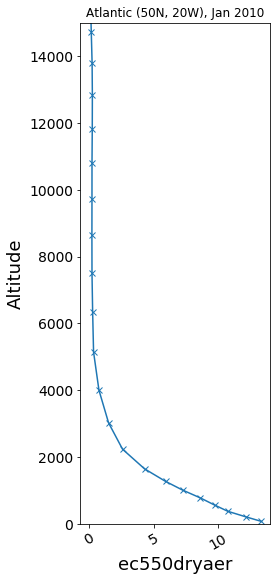

In [15]:
c1_ec_sl = pya.VerticalProfile(ec_sl.grid.data, alts_sl, var_name=ec.var_name)
ax = c1_ec_sl.plot()
ax.set_ylim([0, 15000])
ax.set_title("Atlantic (50N, 20W), Jan 2010", fontsize=12)

#### Hardangervidda coordinate

In [16]:
ec_hv = extract_profile_arr(ec, lat_hv, lon_hv, 0)
p_hv = extract_profile_arr(p, lat_hv, lon_hv, 0)
alts_hv = pya.vert_coords.pressure2altitude(p_hv.grid.data)

In [17]:
c2_ec pya.VerticalProfile(ec_hv.grid.data, alts_hv, var_name=ec.var_name).plot()
ax.set_ylim([0, 15000])
ax.set_title("Hardangervidda, Jan 2010", fontsize=12)

SyntaxError: invalid syntax (<ipython-input-17-219f4bbde21c>, line 1)

### CASE 3

The extinction coefficients are provided as optical depth per layer.

In [ ]:
reader = pya.io.ReadGridded(MOD3)
print(reader)

In [ ]:
# time index for 31.1.
t_idx = int(31 * 24 / 3)
t_idx

In [ ]:
od3d = reader.read_var('od550aer3d')
od_sl = extract_profile_arr(od3d, lat_sl, lon_sl, t_idx)

In [ ]:
od_sl

In [ ]:
dz = reader.read_var('deltaz3d')
dz_arr

In [ ]:
print(od3d.grid)

In [ ]:
od3d.coord_names['air_pressure']

In [ ]:
od3d.grid.coords()